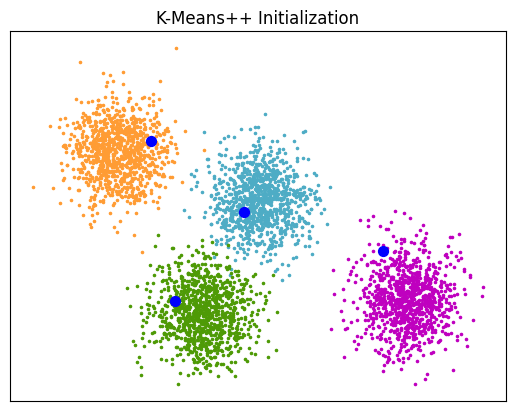

In [1]:
import matplotlib.pyplot as plt

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [2]:
import numpy as np

In [3]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(X)):
    lengths = []
    for k in range(len(centers_init)):
        lengths.append(np.sqrt((X[i, 0] - centers_init[k, 0]) ** 2 + (X[i, 1] - centers_init[k, 1]) ** 2))
    min_len = min(lengths)
    min_len_index = lengths.index(min_len)
    if min_len_index == 0:
        cluster_1.append([X[i, 0], X[i, 1]])
    elif min_len_index == 1:
        cluster_2.append([X[i, 0], X[i, 1]])
    elif min_len_index == 2:
        cluster_3.append([X[i, 0], X[i, 1]])
    elif min_len_index == 3:
        cluster_4.append([X[i, 0], X[i, 1]])

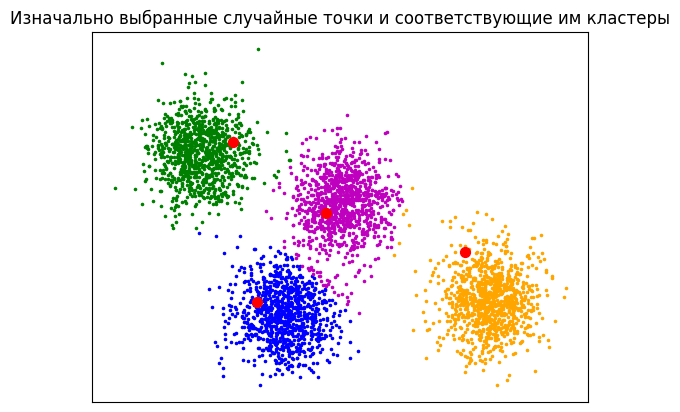

In [4]:
plt.figure(1)

plt.scatter(np.array(cluster_1)[:,0], np.array(cluster_1)[:,1], c="blue", marker=".", s=10)
plt.scatter(np.array(cluster_2)[:,0], np.array(cluster_2)[:,1], c="orange", marker=".", s=10)
plt.scatter(np.array(cluster_3)[:,0], np.array(cluster_3)[:,1], c="g", marker=".", s=10)
plt.scatter(np.array(cluster_4)[:,0], np.array(cluster_4)[:,1], c="m", marker=".", s=10)
    
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="r", s=50)
plt.title("Изначально выбранные случайные точки и соответствующие им кластеры")
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# Рассчитываем координаты центров полученных кластеров
centers_new = []
for clus in [cluster_1, cluster_2, cluster_3, cluster_4]:
    centers_new.append([np.array(clus)[:,0].mean(), np.array(clus)[:,1].mean()])
centers_new = np.array(centers_new)

In [6]:
# Для каждой точки из X ищем, до какого из полученных выше центров наименьшее расстояние
# Создаём новые кластеры: относим каждую точку из X к тому кластеру,
# до ГЛАВНОЙ точки которой (это центр ПРЕДЫДУЩЕГО кластера, а не нового, который мы сейчас создаём) наименьшее расстояние
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(X)):
    lengths = []
    for k in range(len(centers_new)):
        lengths.append(np.sqrt((X[i, 0] - centers_new[k, 0]) ** 2 + (X[i, 1] - centers_new[k, 1]) ** 2))
    min_len = min(lengths)
    min_len_index = lengths.index(min_len)
    if min_len_index == 0:
        cluster_1.append([X[i, 0], X[i, 1]])
    elif min_len_index == 1:
        cluster_2.append([X[i, 0], X[i, 1]])
    elif min_len_index == 2:
        cluster_3.append([X[i, 0], X[i, 1]])
    elif min_len_index == 3:
        cluster_4.append([X[i, 0], X[i, 1]])

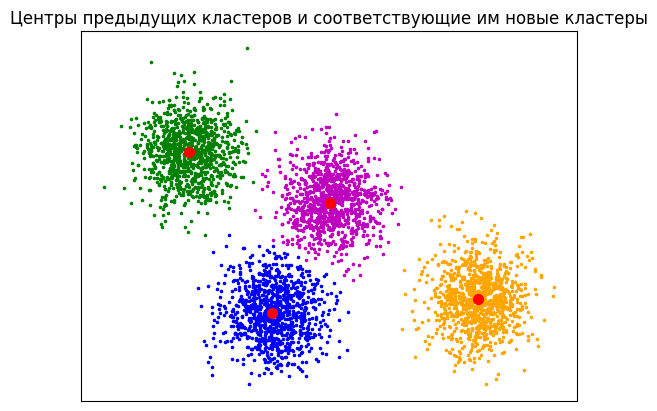

In [7]:
plt.figure(1)

plt.scatter(np.array(cluster_1)[:,0], np.array(cluster_1)[:,1], c="blue", marker=".", s=10)
plt.scatter(np.array(cluster_2)[:,0], np.array(cluster_2)[:,1], c="orange", marker=".", s=10)
plt.scatter(np.array(cluster_3)[:,0], np.array(cluster_3)[:,1], c="g", marker=".", s=10)
plt.scatter(np.array(cluster_4)[:,0], np.array(cluster_4)[:,1], c="m", marker=".", s=10)
    
plt.scatter(centers_new[:, 0], centers_new[:, 1], c="r", s=50)
plt.title("Центры предыдущих кластеров и соответствующие им новые кластеры")
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
centers_previous = centers_init

In [9]:
centers_previous

array([[ 2.26808578, -1.27895043],
       [ 7.23831636, -0.16706431],
       [ 1.68382242,  2.27975032],
       [ 3.91418457,  0.70737086]])

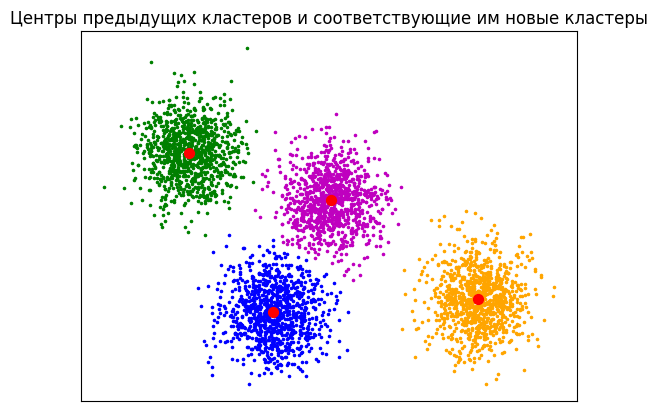

Координаты центров предыдущих кластеров
[[ 2.87922187 -1.5508576 ]
 [ 7.80313631 -1.22774548]
 [ 0.91156568  2.02053699]
 [ 4.27879163  0.89768481]]


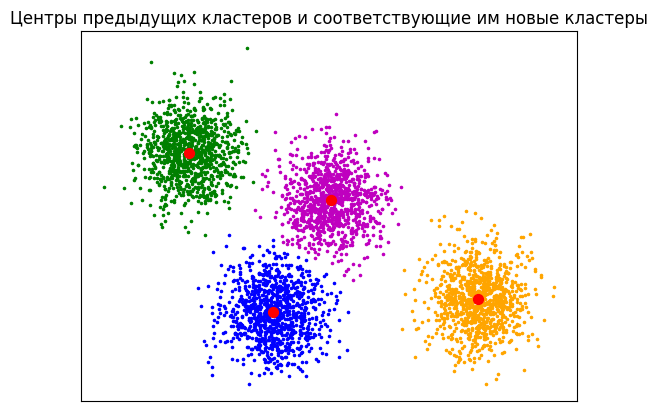

Координаты центров предыдущих кластеров
[[ 2.91690466 -1.52654601]
 [ 7.81533456 -1.23802329]
 [ 0.89810959  2.01811513]
 [ 4.29280748  0.95960778]]


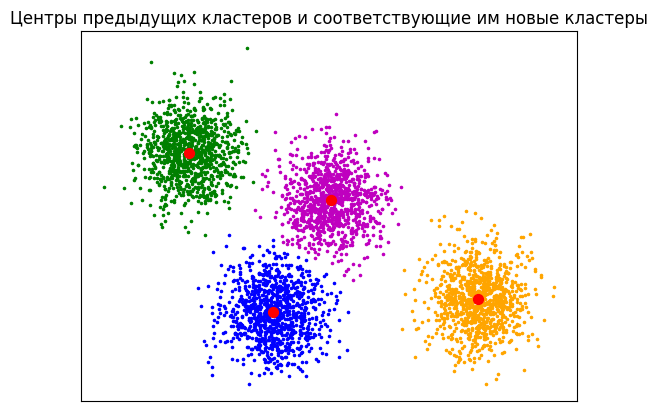

Координаты центров предыдущих кластеров
[[ 2.91767743 -1.52380199]
 [ 7.81533456 -1.23802329]
 [ 0.89810959  2.01811513]
 [ 4.29478497  0.96183057]]


In [10]:
# для центра каждого кластера:
for point in range(len(centers_previous)):
    # пока расстояние между предыдущим и следующим центром кластера больше 0.0001:
    while np.sqrt((centers_new[point] - centers_previous[point])[0]**2 + (centers_new[point] - centers_previous[point])[1]**2) > 0.0001:
        
        centers_previous = centers_new
        centers_new = []
        for clus in [cluster_1, cluster_2, cluster_3, cluster_4]:
            centers_new.append([np.array(clus)[:,0].mean(), np.array(clus)[:,1].mean()])
        centers_new = np.array(centers_new)
        
        cluster_1 = []
        cluster_2 = []
        cluster_3 = []
        cluster_4 = []
        for i in range(len(X)):
            lengths = []
            for k in range(len(centers_new)):
                lengths.append(np.sqrt((X[i, 0] - centers_new[k, 0]) ** 2 + (X[i, 1] - centers_new[k, 1]) ** 2))
            min_len = min(lengths)
            min_len_index = lengths.index(min_len)
            if min_len_index == 0:
                cluster_1.append([X[i, 0], X[i, 1]])
            elif min_len_index == 1:
                cluster_2.append([X[i, 0], X[i, 1]])
            elif min_len_index == 2:
                cluster_3.append([X[i, 0], X[i, 1]])
            elif min_len_index == 3:
                cluster_4.append([X[i, 0], X[i, 1]])
            
        plt.figure(1)
        
        plt.scatter(np.array(cluster_1)[:,0], np.array(cluster_1)[:,1], c="blue", marker=".", s=10)
        plt.scatter(np.array(cluster_2)[:,0], np.array(cluster_2)[:,1], c="orange", marker=".", s=10)
        plt.scatter(np.array(cluster_3)[:,0], np.array(cluster_3)[:,1], c="g", marker=".", s=10)
        plt.scatter(np.array(cluster_4)[:,0], np.array(cluster_4)[:,1], c="m", marker=".", s=10)
            
        plt.scatter(centers_new[:, 0], centers_new[:, 1], c="r", s=50)
        plt.title("Центры предыдущих кластеров и соответствующие им новые кластеры")
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
        print('Координаты центров предыдущих кластеров')
        print(centers_previous)

In [11]:
# Итоговые координаты
centers_new

array([[ 2.91767743, -1.52380199],
       [ 7.81533456, -1.23802329],
       [ 0.89810959,  2.01811513],
       [ 4.29478497,  0.96183057]])

In [12]:
# Проверка
centers_new - centers_previous

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])